In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import pickle

In [2]:
df = pd.read_csv("loan_data.csv")
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [14]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

<Axes: >

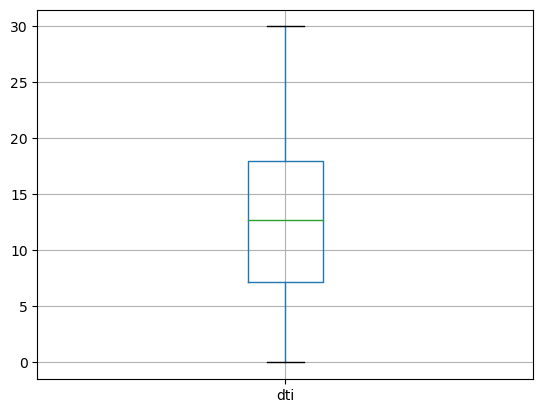

In [15]:
df[['dti']].boxplot()

In [17]:
df[['fico']].boxplot()

<Axes: >

In [28]:
df1 = df.drop(['purpose'], axis = 1)

In [29]:
x = df1.drop('not.fully.paid', axis = 1 )
y = df1['not.fully.paid']
x

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0


In [30]:
x_train, x_test, y_train , y_test = train_test_split(x,y,random_state=1, test_size=0.2, stratify=y)

In [31]:
x_train

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
8405,0,0.1797,364.99,10.762488,23.53,642,4252.041667,10226,63.9,1,1,0
1340,1,0.0768,65.50,10.929529,3.59,757,7529.958333,14538,32.0,1,0,0
667,1,0.1292,222.97,10.239960,19.93,667,5729.041667,15049,71.3,0,0,0
5655,1,0.1253,510.37,10.494048,20.78,707,7740.041667,22376,47.9,1,1,0
4085,1,0.1253,334.67,10.736397,12.83,702,1709.958333,7882,29.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1,0.0932,255.58,11.156193,1.08,757,4232.041667,3416,8.6,1,0,0
7982,0,0.1438,137.45,9.615805,16.32,647,1049.000000,4364,101.5,5,0,0
4743,1,0.1392,273.10,11.362149,22.55,677,2940.000000,2149,36.4,2,0,0
7041,1,0.0774,187.32,11.695247,4.70,767,5730.041667,4378,27.4,0,0,0


In [32]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

### testing

In [36]:
y_pred_test = log_reg.predict(x_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
confusion_matrix(y_test,y_pred_test)

array([[1604,    5],
       [ 306,    1]])

In [40]:
y_test.value_counts()

not.fully.paid
0    1609
1     307
Name: count, dtype: int64

In [44]:
clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n",clf_report)

Classification Report :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.17      0.00      0.01       307

    accuracy                           0.84      1916
   macro avg       0.50      0.50      0.46      1916
weighted avg       0.73      0.84      0.77      1916



### traning 

In [45]:
y_pred_train = log_reg.predict(x_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
confusion_matrix(y_train,y_pred_train)

array([[6411,   25],
       [1204,   22]])

In [47]:
y_train.value_counts()

not.fully.paid
0    6436
1    1226
Name: count, dtype: int64

In [48]:
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Classification Report :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      6436
           1       0.47      0.02      0.03      1226

    accuracy                           0.84      7662
   macro avg       0.65      0.51      0.47      7662
weighted avg       0.78      0.84      0.77      7662



In [55]:
with open("logistic_regression_model.pkl", 'wb') as f:
    model = pickle.dump(log_reg,f)